In [1]:
import matplotlib.pyplot as plt
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_aer.noise import (NoiseModel, pauli_error, depolarizing_error)

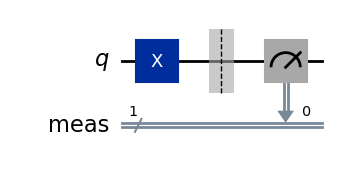

In [2]:
# make circuit
my_qubits = [0]
circ = QuantumCircuit(len(my_qubits))
circ.x(my_qubits)
circ.measure_all()

circ.draw("mpl")

In [10]:
# simulate with noise
noise_prob = 0.2
noise_model = NoiseModel()
error = pauli_error([('X', noise_prob), ('I', 1 - noise_prob)])
noise_model.add_quantum_error(error, ['x'], my_qubits)
sim = AerSimulator(noise_model=noise_model)

In [36]:
# transpile and run
circ_trans = transpile(circ, sim)
result = sim.run(circ_trans).result()
counts = result.get_counts(circ_trans)
print(counts)
plot_histogram(counts)
plt.savefig("hi.png")

{'0': 210, '1': 814}


<Figure size 640x480 with 0 Axes>